#### Section 1 Business understanding

Let's imagine that you are a programmer and wondering how to increase you're salary. Project follows the CRISP-DM process

Based on data colected by Stackoverflow in 2017 Annual Developer Survey, I wil give you some hints, what might be beneficial for you or what makes no much a difference in terms of salary. There are 64,000 reviews from 213 countries, survey aims to understand aspects of jobs related to software development and data analytics.

In below analysis, I will show following aspects related to salary size:
##### Question I: More programming languages you know - more you earn?
##### Question II: If you know Python, you earn more?
##### Question III: Location makes a difference?

#### Section 2 Data Understanding

##### Gather

In [122]:
'''Import necessary libaries and load the data'''

import numpy as np
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Section 3 Data Preparation

In [123]:
def findContinent(country_name):
    '''Functions finds continent for given country.'''
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    #pycountry.countries.get(name=country_name).alpha_2
    except:
        return ("not founded!")
    
# Add column 'continent'
df['continent'] = df.apply(lambda row: findContinent(row.Country) , axis = 1)

In [3]:
#Which columns had no missing values?
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University',
 'continent'}

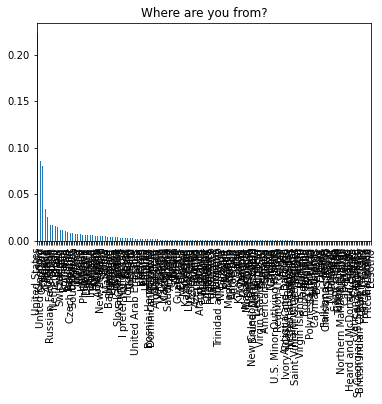

In [4]:
#bar chart of the proportion of individuals in each country

country_vals = df.Country.value_counts()#Provide a pandas series of the counts for each country

(country_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

In [5]:
#Which columns have the most missing values
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
most_missing_cols

{'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'MobileDeveloperType',
 'NonDeveloperType',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

In [6]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [7]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 155 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Respondent                        51392 non-null  int64  
 1    Professional                      51392 non-null  object 
 2    ProgramHobby                      51392 non-null  object 
 3    Country                           51392 non-null  object 
 4    University                        51392 non-null  object 
 5    EmploymentStatus                  51392 non-null  object 
 6    FormalEducation                   51392 non-null  object 
 7    MajorUndergrad                    42841 non-null  object 
 8    HomeRemote                        44008 non-null  object 
 9    CompanySize                       38922 non-null  object 
 10   CompanyType                       38823 non-null  object 
 11   YearsProgram                      51145 non-null  ob

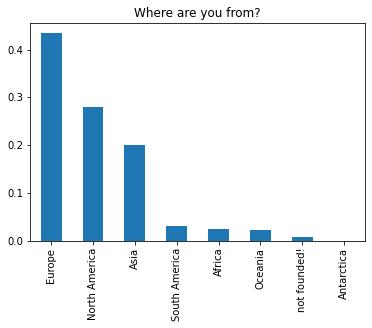

In [8]:
#bar chart of the proportion of individuals in each country

continent_vals = df.continent.value_counts()#Provide a pandas series of the counts for each country

(continent_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

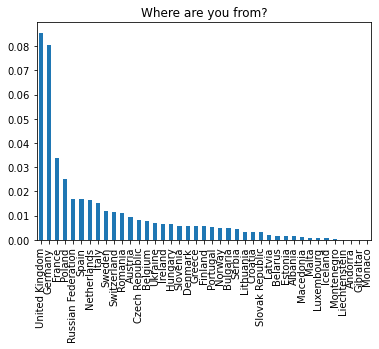

In [11]:
europe_vals=df[df["continent"] =='Europe'].Country.value_counts()
(europe_vals/df.shape[0]).plot(kind="bar");
plt.title("Where are you from?");

In [124]:
# add column with number of programing languages worked
df['NumberLanguageWorked'] = df['HaveWorkedLanguage'].str.count(' ').add(1)

In [50]:
# check if above works
df[['HaveWorkedLanguage', 'NumberLanguageWorked']].head(3)

,HaveWorkedLanguage,NumberLanguageWorked
0,Swift,1.0
1,JavaScript; Python; Ruby; SQL,4.0
2,Java; PHP; Python,3.0


#### Section 4 Evaluation

##### Question I: More programming languages you know - more you earn?

##### Analyze

In [141]:
df_q1=df.copy()

In [130]:
# testing: add each programing language to separate column
df_q1["HaveWorkedLanguage"].str.split(';', expand=True).head(3)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Swift,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Python,Ruby,SQL,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Java,PHP,Python,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [131]:
# testing: programing languages popularity
df_q1.HaveWorkedLanguage.str.split(';\s+', expand=True).stack().value_counts().head(5)

JavaScript    22875
SQL           18754
Java          14524
C#            12476
Python        11704
dtype: int64

<AxesSubplot:title={'center':'NumberLanguageWorked ~ mean Salary'}, xlabel='NumberLanguageWorked'>

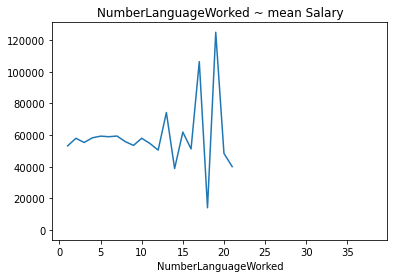

In [132]:
df_q1.groupby('NumberLanguageWorked')['Salary'].mean().plot(title='NumberLanguageWorked ~ mean Salary')

Drop the missing values of the response (Salary) - store this in drop_sal_df, then impute the values for all the other missing values with the mean of the column - store this in fill_df.

In [133]:
drop_sal_df = df_q1.dropna(subset=['Salary'], axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent,NumberLanguageWorked
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe,3.0
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,Europe,3.0
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,North America,7.0


In [137]:
df_q1[df_q1["Salary"].notna()].head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent,NumberLanguageWorked
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe,3.0
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,Europe,3.0
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,North America,7.0


In [142]:
#impute the values for all the other missing values with the mean of the column
df_q1["Salary"] = df_q1['Salary'].fillna(df_q1.groupby('NumberLanguageWorked')['Salary'].transform('mean'))
df_q1["Salary"]

0         53167.089577
1         58238.351358
2        113750.000000
3         58238.351358
4                  NaN
             ...      
51387     58000.000000
51388     57944.074622
51389              NaN
51390     40000.000000
51391     58934.946843
Name: Salary, Length: 51392, dtype: float64

In [145]:
# check
df_q1['Salary'].isna().sum()

14017

In [146]:
# check
df['Salary'].isna().sum()

38501

In [147]:
# check
df_q1['Salary'].notna().sum()

37375

In [148]:
# check
df['Salary'].notna().sum()

12891

Number of None has decreased but not there are still some because not in every group of 'NumberLanguageWorked' there is a salary. So I drop those values w/o salary

In [151]:
# check where salary is NaN and NumberLanguageWorked is not NaN. sort output
df_q1[['Salary','NumberLanguageWorked']][(df_q1["Salary"].isna())&(~df_q1["NumberLanguageWorked"].isna())].sort_values("NumberLanguageWorked").head(3)

,Salary,NumberLanguageWorked
11579,NaN,22.0
21725,NaN,22.0
37745,NaN,22.0


In [152]:
# check where salary is not Nan and NumberLanguageWorked is Nan
df_q1[['Salary','NumberLanguageWorked']][(~df_q1["Salary"].isna())&(df_q1["NumberLanguageWorked"].isna())].head(3)

,Salary,NumberLanguageWorked
18,82500.000000,NaN
69,32258.064516,NaN
152,107816.711590,NaN


In [154]:
# check if for NumberLanguageWorked < 20 there is NaN Salary
df_q1[['Salary','NumberLanguageWorked']][(df_q1["Salary"].isna())&(df_q1["NumberLanguageWorked"]<20)]

,Salary,NumberLanguageWorked


In [156]:
# create df_q1_20 with less than 20 NumberLanguageWorked
df_q1_20=df_q1[(df_q1["NumberLanguageWorked"]<20)]
df_q1_20.shape

(36591, 156)

In [157]:
# check
df.shape

(51392, 156)

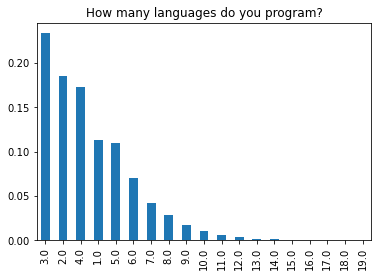

In [158]:
#bar chart of the proportion of individuals in each country

language_vals = df_q1_20.NumberLanguageWorked.value_counts()#Provide a pandas series of the counts for each country

(language_vals/df_q1_20.shape[0]).plot(kind="bar");
plt.title("How many languages do you program?");

<AxesSubplot:title={'center':'Salary'}, xlabel='NumberLanguageWorked'>

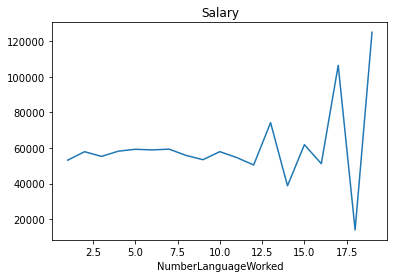

In [159]:
df_q1_20.groupby('NumberLanguageWorked')['Salary'].mean().plot(title='Salary')

In [161]:
# narrowing down to less then 7
df_q1_7=df_q1_20[(df_q1_20["NumberLanguageWorked"]<7)]
df_q1_7.shape

(32408, 156)

<AxesSubplot:title={'center':'Salary'}, xlabel='NumberLanguageWorked'>

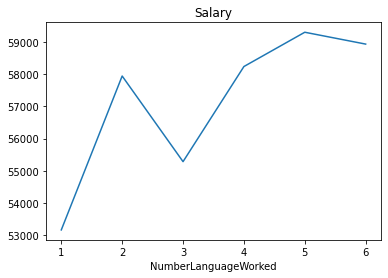

In [162]:
df_q1_7.groupby('NumberLanguageWorked')['Salary'].mean().plot(title='Salary')

Majority of asked people can program in 3 languages (more than 20%). When narrowing down data to programmers who can program in 6 or less, there is a hughe jump in avarage Salary from one known language or two (from 53,000 to 58,000) but then there is stable with an exception in knowledge of 3 programming languages

##### Question II: If you know Python, you earn more?

##### Analyze

In [51]:
# check how many rows have na in salary
df[df["Salary"].isna()].count()

Respondent              38501
Professional            38501
ProgramHobby            38501
Country                 38501
University              38501
                        ...  
InterestedAnswers       23014
Salary                      0
ExpectedSalary           2566
continent               38501
NumberLanguageWorked    24497
Length: 156, dtype: int64

In [52]:
#create df_salary dataframe where salary and HaveWorkedLanguage are not empty
df_salary=df[(~df["Salary"].isna())&(~df["HaveWorkedLanguage"].isna())]

In [53]:
df_salary.shape

(12128, 156)

In [54]:
# check above
df_salary[['Respondent','HaveWorkedLanguage']][df_salary['HaveWorkedLanguage'].isna()]

,Respondent,HaveWorkedLanguage


In [ ]:
#df['NumberLanguageWorked'] = df['HaveWorkedLanguage'].str.count(' ').add(1)

In [55]:
# check if .str.contains('Python') workes
df_salary[['Respondent','HaveWorkedLanguage']][df_salary['HaveWorkedLanguage'].str.contains('Python')]

,Respondent,HaveWorkedLanguage
2,3,Java; PHP; Python
75,76,Assembly; C; C++; Java; JavaScript; Perl; Pyth...
90,91,C; JavaScript; Python
103,104,Python
126,127,C#; Java; JavaScript; Python; SQL
...,...,...
51340,51341,Python
51355,51356,C#; Elixir; F#; JavaScript; Python; SQL
51371,51372,Go; JavaScript; Python
51378,51379,JavaScript; Objective-C; Python; Swift


In [57]:
df_salary['HaveWorkedLanguage'].isin(['Python']).head(3)

2     False
14    False
17    False
Name: HaveWorkedLanguage, dtype: bool

In [58]:
# add column 'Python' where HaveWorkedLanguage contains Python -> true -> else False
df_salary['Python'] = np.where(df_salary['HaveWorkedLanguage'].isin(['Python']), True, False)

<ipython-input-58-f874eb96d592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Python'] = np.where(df_salary['HaveWorkedLanguage'].isin(['Python']), True, False)


In [59]:
# add column 'Python' where HaveWorkedLanguage contains Python -> true -> else False
df_salary['Python']=df_salary['HaveWorkedLanguage'].str.contains('Python', case=False, na=False)

<ipython-input-59-f92165dbebad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['Python']=df_salary['HaveWorkedLanguage'].str.contains('Python', case=False, na=False)


In [61]:
#check
df_salary['Python'][df_salary['HaveWorkedLanguage'].str.contains('Python')].value_counts()

True    3442
Name: Python, dtype: int64

In [62]:
#check
df_salary['Python'][~df_salary['HaveWorkedLanguage'].str.contains('Python')].value_counts()

False    8686
Name: Python, dtype: int64

#### Visualise

<AxesSubplot:title={'center':'Salary~Python'}, xlabel='Python'>

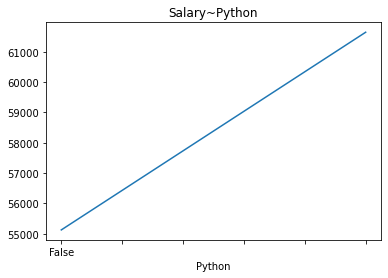

In [63]:
df_salary.groupby('Python')['Salary'].mean().plot(title='Salary~Python')

It is better to know Python than not to know

##### Question III: Location makes a difference?### 3. discrapancy between salary and expected salary for whom is the biggest

##### Analyze

In [65]:
# create df_continent where Salary is not null
df_continent=df[(~df["Salary"].isna())]
df_continent.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,continent,NumberLanguageWorked
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe,3.0
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN,Europe,3.0
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN,North America,7.0


<AxesSubplot:title={'center':'Salary~continent'}, xlabel='continent'>

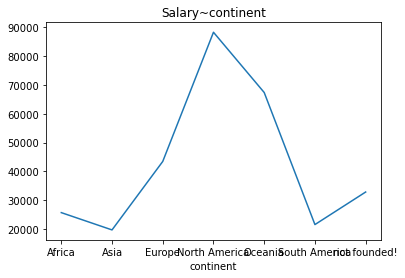

In [66]:
# plot mean salary for each continent
df_continent.groupby('continent')['Salary'].mean().plot(title='Salary~continent')

In [67]:
# create df_europe where are only european countries
df_europe=df_continent[(df_continent["continent"]=="Europe")]
df_europe['continent'].value_counts()

Europe    5877
Name: continent, dtype: int64

<AxesSubplot:title={'center':'Salary~Europe'}, xlabel='Country'>

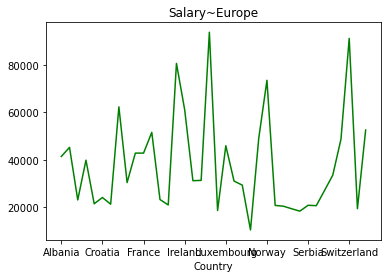

In [68]:
# plot mean salary for each european country
df_europe.groupby('Country')['Salary'].mean().plot(title='Salary~Europe',color='green')

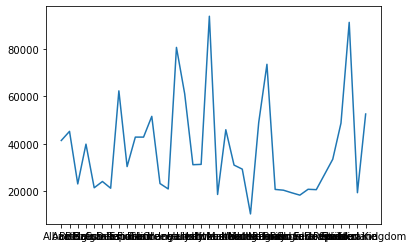

In [69]:
# same as above with different method
plt.plot(df_europe.groupby('Country')['Salary'].mean())

In [75]:
# create list of mean salary for each country and slect 4 elelements to check it
country_list = df_europe.groupby('Country')['Salary'].mean().value_counts().index.tolist()
country_list[0:3]

[23168.11584516848, 41455.72276315604, 73534.35302195427]

In [76]:
# check mean salary for df_europe
df_europe['Salary'].mean()

43458.45067858717

In [78]:
# create country_mean dataframe with country and mean salary for this country
country_mean=pd.DataFrame(df_europe.groupby('Country', as_index=False).agg({"Salary": "mean"}).sort_values("Salary",ascending=False))
country_mean.head(3)

,Country,Salary
18,Liechtenstein,93766.666667
35,Switzerland,91189.692616
14,Iceland,80645.161290


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

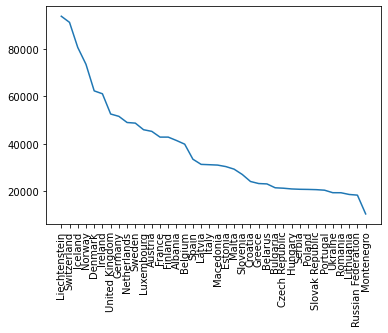

In [79]:
# plot mean salary for country rotate lables of x axis
plt.plot(country_mean['Country'],country_mean['Salary'])
plt.xticks(rotation=90)

In [81]:
# create df_ExpectedEU where ExpectedSalary is not null and continent = Europe, then check shape
df_ExpectedEU=df[(~df["ExpectedSalary"].isna())&(df["continent"]=="Europe")]
df_ExpectedEU.shape

(1160, 156)

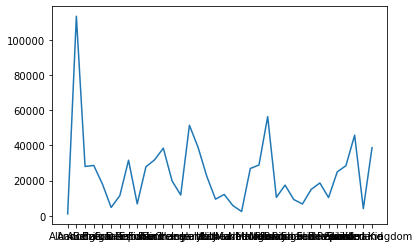

In [83]:
# plot mean ExpectedSalary for each country
plt.plot(df_ExpectedEU.groupby('Country')['ExpectedSalary'].mean())

In [84]:
# create ExpectedEU_mean dataframe with country and mean ExpectedSalary for each country
ExpectedEU_mean=pd.DataFrame(df_ExpectedEU.groupby('Country', as_index=False).agg({"ExpectedSalary": "mean"}).sort_values("ExpectedSalary",ascending=False))
ExpectedEU_mean.head(3)

,Country,ExpectedSalary
1,Andorra,113636.363636
23,Norway,56480.314161
14,Iceland,51516.129032


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

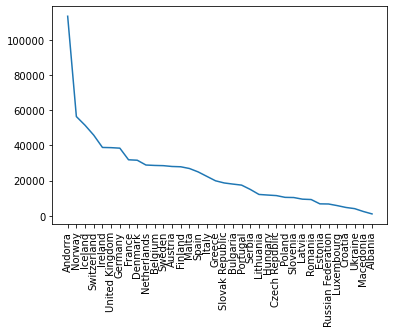

In [89]:
# plot mean ExpectedSalary for each country
plt.plot(ExpectedEU_mean['Country'],ExpectedEU_mean['ExpectedSalary'])
plt.xticks(rotation=90)

In [86]:
# merge country_mean df and ExpectedEU_mean df on='Country'
merge=pd.merge(country_mean, ExpectedEU_mean, on='Country')
merge.head(3)

,Country,Salary,ExpectedSalary
0,Switzerland,91189.692616,45863.709677
1,Iceland,80645.161290,51516.129032
2,Norway,73534.353022,56480.314161


#### Visualise

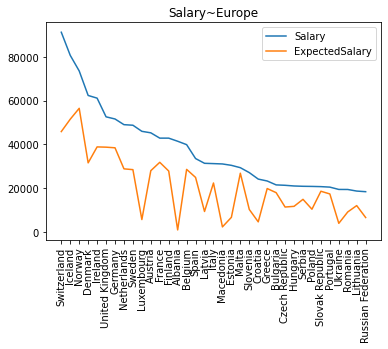

In [87]:
plt.plot(merge['Country'],merge['Salary'], label = "Salary")
plt.plot(merge['Country'],merge['ExpectedSalary'], label = "ExpectedSalary")
plt.xticks(rotation=90)
plt.title('Salary~Europe')
plt.legend(["Salary", "ExpectedSalary"], loc ="upper right")

It looks like programmers in all location think that they will earn less that they actualy are earning. It makes a huge diference if you are based in Switzerland than in Latvia or Poland.